Before we begin, we must perform the proper incantations.

In [1]:
import numpy as np
import scipy as sp
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


# Digital images

A digital image is a 2D array (3D for color) of numbers. These numbers Images can be stored in many specific formats; here we'll use `plt.imread()` to load a PNG image.

In [2]:
im = plt.imread("0004-06112009-3d-Control (Control 1 uM day3 x5)_f2.png")

We can print the shape of the image as follows:

In [3]:
print im.shape

(1040, 1388, 3)


This is a "1k" image (around 1000 by 1000 pixels), with three color channels corresponding to red, green, and blue.

The image is a microscope picture, or micrograph, of juvenile parasites called schistosomes. These worms can infect people's liver and intestines, causing cancer and chronic health problems. The illness, schistosomiasis, is considered the second-most socioeconomically damaging illness in the world (after malaria). Despite its outsized public health impact, very little research focuses on new treatments for this disease, because it primarily affects low-income people in sub-Saharan Africa and Southeast Asia.

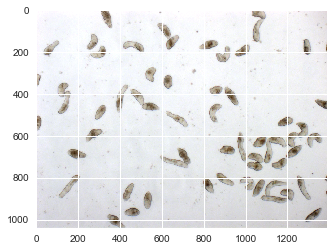

In [4]:
plt.imshow(im)

To simplify matters, let's conver the image from color to grayscale, or "intensity," by computing the Euclidean magnitude of the color vector at each pixel. 

In [5]:
img = np.sqrt(np.sum(im**2, axis=2))

This reduces the array from 3D to 2D.

In [6]:
print img.shape

(1040, 1388)


In [7]:
# We subtract and min divide by the max to keep the values in [0, 1],
# and set the color map to "gray" (try "magma" and compare).
img = (img - np.min(img)) / (np.max(img) - np.min(img))

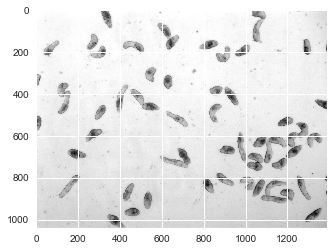

In [8]:
plt.imshow(img, cmap="gray")

Let's also invert the image, so that the objects are bright and the background is dark.

In [9]:
img = 1 - img

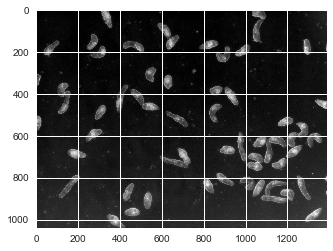

In [10]:
plt.imshow(img, "gray")

An important feature of the image is the distribution of the intensities. Let's compute a histogram of the intensities and take a look:

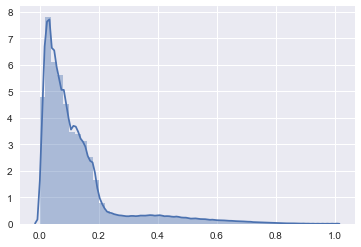

In [11]:
sns.distplot(img.reshape(-1))

Notice the local minimum around 0.22, which rougly separates two different populations of pixels (centered at ~0.075 and ~0.35)

# Image segmentation
A common problem in computer vision is *segmentation*, the process of identifying (or segmenting) those pixels that belong to an object (or *foreground*) as opposed to the *background*.

The simplest segmentation method is to *threshold* the image. We create a binary (black vs white, one vs zero) image by taking every pixel above a certain intensity.

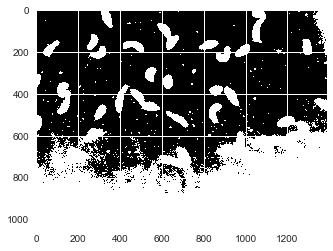

In [12]:
# An arbitrary threshold. The "gray" cmap will make high values white.
plt.imshow(img > 0.1, cmap="gray")

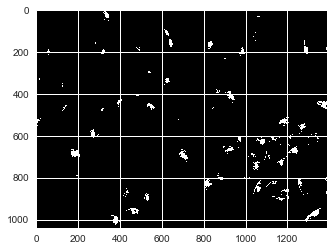

In [13]:
# Too low? What about this:
plt.imshow(img > 0.6, cmap="gray")

In [ ]:
# What should the threshold be? How do you know?
# t = ???
plt.imshow(img > t, cmap="gray")

It's easy to find a threshold that segments the foreground (parasites) well.

*What are the major limitations of this method for object detection?*

# Histogram methods

A number of useful image processing operations are based on simple 1D histograms or similar calculations.

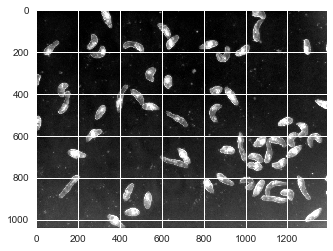

In [15]:
# Contrast equalization by percentile based clipping.
low = np.percentile(img, 1)
high = np.percentile(img, 99)
plt.imshow(np.clip(img, a_min=low, a_max=high), cmap="gray")

Why is that a form of "contrast equalization?" How does it affect contrast at the low- and high-end of the intensity range?

In the last section, we chose a good threshold for the image by hand.

**Problem 1** Come up with an algorithm to select a good threshold automatically.

In [16]:
# Here is some useful info about the intensity image.
sp.stats.describe(img.flat)

DescribeResult(nobs=1443520, minmax=(0.0, 1.0), mean=0.124778375, variance=0.018472854, skewness=2.3958685398101807, kurtosis=6.359998358445258)

# Edge detection

You may have realized failure to separate of multiple objects is a major issue with simple threshold-based segmentation. One way to address this is by looking at object boundaries in 2D (rather than simple 1D image statistics). *Edge detection* is an easy-sounding concept, yet it is deceptively challenging. Let's start by computing the *gradient magnitude* (first derivative) of the intensity image from earlier.

In [17]:
dI_dy, dI_dx = np.gradient(img)  # Rows = y, columns = x.
g = np.sqrt(dI_dx**2 + dI_dy**2)  # How might this function work?

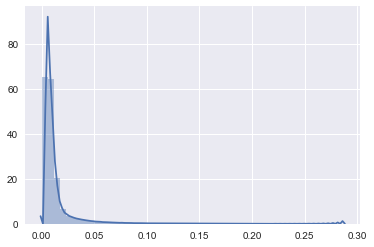

In [18]:
sns.distplot(g.flat)  # Histograms are an important tool!

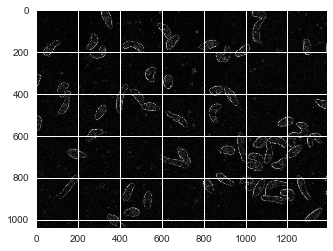

In [19]:
plt.imshow(g, cmap="gray")

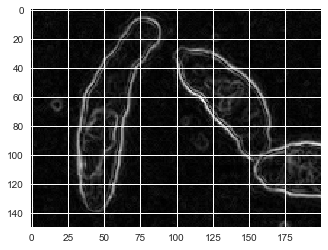

In [20]:
# Lets look a little closer.
plt.imshow(g[350:500, 350:550], cmap="gray")

**Problem 2** Devise an edge detection algorithm based on gradient magnitude.

**Problem 3** Find a way to incorporate gradient *direction*.

In [21]:
# Hint: the angle of a vector is computed with the "atan2" function.
# Arctan2 saves the quadrant of the angle.
ang = np.arctan2(dI_dy, dI_dx)  # Radians.